## If you want to know  the frequency or the importance of each word from a dataset, you can use WordCloud to check the maximum frequency words in different size

## I have used my facebook posts data to check the most used 40 words from  3925 posts made by me in last 9 years.

** If you want to download your data, you can check this link (https://www.facebook.com/help/1701730696756992) to know how you can get your facebook information.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
post_df = pd.read_json('../your_posts_1.json') #load the json data
post_df.head() #show the first 5 rows

,timestamp,attachments,data,title,tags
0,2020-09-22 17:55:42,[{'data': [{'external_context': {'url': 'https...,[{'post': 'Day-1 Completed. 1. Code: I have ...,NaN,NaN
1,2020-09-21 12:51:32,NaN,[{'post': 'You can take this challenge as well...,Md Kishor Morol posted in AIUBian@MOOC.,NaN
2,2020-09-21 12:50:53,NaN,[{'post': 'Exactly 100 days are remaining of 2...,Md Kishor Morol updated his status.,NaN
3,2020-09-21 06:12:50,NaN,"[{'post': 'Happy Birthday, Sir.'}]",Md Kishor Morol wrote on Dev Karmaker's timeline.,NaN
4,2020-09-21 04:16:12,[],[{'update_timestamp': 1600661772}],Md Kishor Morol shared a video from the playli...,NaN


In [21]:
post_df

,timestamp,attachments,data,title,tags
0,2020-09-22 17:55:42,[{'data': [{'external_context': {'url': 'https...,[{'post': 'Day-1 Completed. 1. Code: I have ...,NaN,NaN
1,2020-09-21 12:51:32,NaN,[{'post': 'You can take this challenge as well...,Md Kishor Morol posted in AIUBian@MOOC.,NaN
2,2020-09-21 12:50:53,NaN,[{'post': 'Exactly 100 days are remaining of 2...,Md Kishor Morol updated his status.,NaN
3,2020-09-21 06:12:50,NaN,"[{'post': 'Happy Birthday, Sir.'}]",Md Kishor Morol wrote on Dev Karmaker's timeline.,NaN
4,2020-09-21 04:16:12,[],[{'update_timestamp': 1600661772}],Md Kishor Morol shared a video from the playli...,NaN
...,...,...,...,...,...
3920,2011-10-27 06:57:00,NaN,[{'post': 'ay bonga'}],Md Kishor Morol wrote on Mehedi Hasan Saurav's...,NaN
3921,2011-10-27 06:51:34,NaN,[{'post': 'hi rudi.tui koy?'}],Md Kishor Morol wrote on Touhidul Islam Neon's...,NaN
3922,2011-10-26 15:06:40,NaN,[{'post': 'hello everyone.how r u?'}],Md Kishor Morol updated his status.,NaN
3923,2011-10-25 17:05:08,NaN,[{'post': 'hi brother.i am ur ......'}],Md Kishor Morol wrote on -munawar Anjum-'s tim...,NaN


In [22]:
post_df = post_df.drop(['attachments', 'timestamp', 'title', 'tags'],axis=1) #drop the unnecessay column

In [23]:
post_df

,data
0,[{'post': 'Day-1 Completed. 1. Code: I have ...
1,[{'post': 'You can take this challenge as well...
2,[{'post': 'Exactly 100 days are remaining of 2...
3,"[{'post': 'Happy Birthday, Sir.'}]"
4,[{'update_timestamp': 1600661772}]
...,...
3920,[{'post': 'ay bonga'}]
3921,[{'post': 'hi rudi.tui koy?'}]
3922,[{'post': 'hello everyone.how r u?'}]
3923,[{'post': 'hi brother.i am ur ......'}]


In [24]:
post_df['data']

0       [{'post': 'Day-1 Completed. 

1. Code: I have ...
1       [{'post': 'You can take this challenge as well...
2       [{'post': 'Exactly 100 days are remaining of 2...
3                      [{'post': 'Happy Birthday, Sir.'}]
4                      [{'update_timestamp': 1600661772}]
                              ...                        
3920                               [{'post': 'ay bonga'}]
3921                       [{'post': 'hi rudi.tui koy?'}]
3922                [{'post': 'hello everyone.how r u?'}]
3923              [{'post': 'hi brother.i am ur ......'}]
3924       [{'post': 'ki obosta rudi.ferighat jabe na?'}]
Name: data, Length: 3925, dtype: object

In [25]:
post_df['data']= post_df['data'].astype(str) #convert object to pandas series

In [26]:
posts = pd.Series.to_string(post_df['data']) #convert series to string

In [27]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
posts_punc_removed = [ char for char in posts if char not in string.punctuation] #remove the punctution marks

In [29]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVZXYZabcdefghijklmnopqrstuvwxyz " #we need just english alphabet

In [30]:
posts_garbage_removed = [ char for char in posts_punc_removed if char in alphabet] #remove other character excpt alphabet

In [31]:
all_sentences = ''.join(posts_garbage_removed)

In [32]:
removed_words = np.array(['updatetimestamp','post', 'nan','xfx','xf','xxx','xx', 'xfxx']) #choose unnecessary words

In [33]:
words = [word for word in all_sentences.split() if word not in removed_words] #remove unnecessary words

In [34]:
sentences_as_words = " ".join(words)

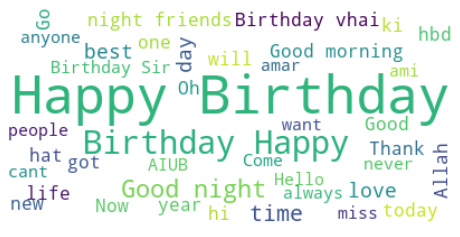

In [35]:
wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(sentences_as_words)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()